<a href="https://colab.research.google.com/github/ArmanBehi/Evolution-MB/blob/main/Evolution_MB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import matplotlib.gridspec as gridspec
#globals().clear()  # Clears all variables in the global scope

#Introducing Inputs from Projecting Neurons (PNs) and Mushrom Body Input Neurons (MBIN) to Mushrom Body (MB)

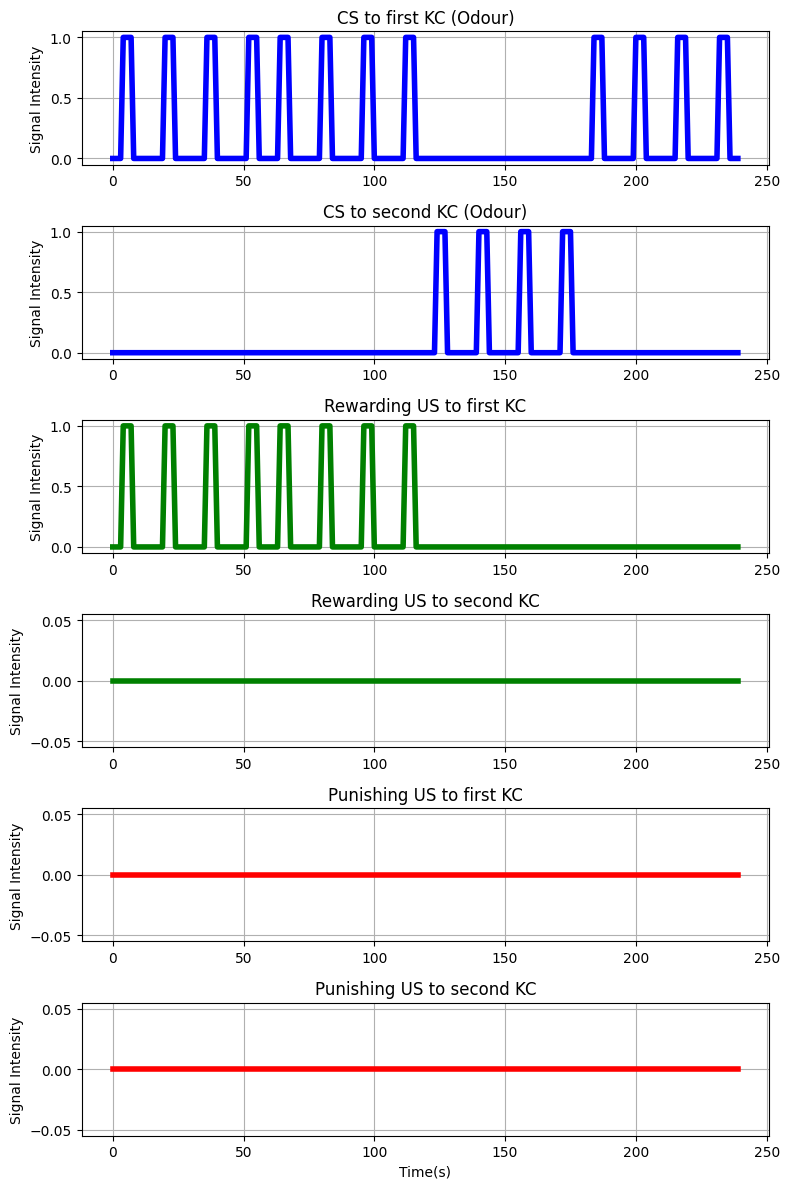

In [ ]:
# Introducing inputs to system
CS_1 = [0,1,0,0,0,1,0,0,0,1,0,0,0,1,0]  # neutral odor 1
CS_2 = [0,0,0,1,0,0,0,1,0,0,0,1,0,0,0]  #natural odour2
US_1 = [0,1,0,0,0,1,0,0,0,1,0,0,0,1,0]  # reward
US_2 = [0,0,0,1,0,0,0,1,0,0,0,1,0,0,0]  # punishment

US11 = np.hstack((US_1,US_1,np.zeros(len(US_1)),np.zeros(len(US_1))))
US12 = np.hstack((np.zeros(len(US_1)),np.zeros(len(US_1)),np.zeros(len(US_1)),np.zeros(len(US_1)))) #Take care we coulden't have the rearding US and punishing US at the same time
US21 = np.hstack((np.zeros(len(US_1)),np.zeros(len(US_1)),np.zeros(len(US_1)),np.zeros(len(US_1))))
US22 = np.hstack((np.zeros(len(US_1)),np.zeros(len(US_1)),np.zeros(len(US_1)),np.zeros(len(US_1))))

CS1 = np.hstack((US_1,US_1,np.zeros(len(US_1)),US_1))
CS2 = np.hstack((np.zeros(len(US_1)),np.zeros(len(US_1)),US_1,np.zeros(len(US_1))))

dt = .1
N_i = round(len(CS1) / dt)
t_i = np.arange(1, N_i + 1) * dt

# Replicate stimuli along time axis
n = round(1 / dt)  # number of replications

def expand_list(input_list, num_extensions):
    expanded_list = []
    for item in input_list:
        expanded_list.extend([item] * num_extensions)
    return np.array(expanded_list)


CS1 = expand_list(CS1,4)
CS2 = expand_list(CS2,4)

US11 = expand_list(US11,4)
US12 = expand_list(US12,4)
US21 = expand_list(US21,4)
US22 = expand_list(US22,4)

plt.figure(1, figsize=(8, 12))

plt.subplot(6, 1, 1)
plt.plot(CS1, 'b', linewidth=4)
plt.grid(True)
plt.title('CS to first KC (Odour)')
plt.ylabel('Signal Intensity')

plt.subplot(6, 1, 2)
plt.plot(CS2, 'b', linewidth=4)
plt.grid(True)
plt.title('CS to second KC (Odour)')
plt.ylabel('Signal Intensity')

plt.subplot(6, 1, 3)
plt.plot(US11, 'g', linewidth=4)
plt.grid(True)
plt.title('Rewarding US to first KC')
plt.ylabel('Signal Intensity')

plt.subplot(6, 1, 4)
plt.plot(US12, 'g', linewidth=4)
plt.grid(True)
plt.title('Rewarding US to second KC')
plt.ylabel('Signal Intensity')

plt.subplot(6, 1, 5)
plt.plot(US21, 'r', linewidth=4)
plt.grid(True)
plt.title('Punishing US to first KC')
plt.ylabel('Signal Intensity')

plt.subplot(6, 1, 6)
plt.plot(US22, 'r', linewidth=4)
plt.grid(True)
plt.title('Punishing US to second KC')
plt.ylabel('Signal Intensity')
plt.xlabel('Time(s)')

# Adjust spacing between subplots
plt.tight_layout()

plt.show()

#Introducing Kenyon Cells (KC) to the system

In [ ]:
# Define functions
def activation_function(s_i, rmax, kappa): #Introducing non-linearity to the system
    return (rmax * s_i**2) / (kappa**2 + s_i**2)

# Combination of inputs to Kenyon cells
S_i = np.vstack((CS1, CS2, US11, US12, US21, US22))  # Combine stimulus activities for matrix multiplication
S_0 = np.zeros((6, 1))  # Initial values

# Allocate activity of K cells
N_i = len(CS1)
K11_i = np.full(N_i, np.nan)  # odor 1, rewarded
K12_i = np.full(N_i, np.nan)  # odor 1, punished
K21_i = np.full(N_i, np.nan)  # odor 2, reward
K22_i = np.full(N_i, np.nan)  # odor 2, punished

K_0 = np.zeros((4, N_i))  # Modify the shape to match K_i
#K_0 = np.zeros((2, 1))  # Modify the shape to match K_i
K_i = np.vstack((K11_i, K12_i, K21_i, K22_i)) # Combine K-cell activities for matrix multiplication

# Obtain time-course of combined inputs to K-cells
alpha = 5  # Gain factor when US and CS coincide
Kmax = 5
Khalf = 2

K11_input_i = np.max([CS1, US11, alpha * CS1 * US11], axis=0)  # Categorical values
K12_input_i = np.max([CS1, US21, alpha * CS2 * US12], axis=0)
K21_input_i = np.max([CS2, US12, alpha * CS2 * US12], axis=0)
K22_input_i = np.max([CS2, US22, alpha * CS2 * US12], axis=0)
K_input_i = np.vstack((K11_input_i, K12_input_i,K21_input_i,K22_input_i))  # Combine for matrix multiplication

# Steady-state value (this step is not really needed), but by changing Khalf the influence of the US can be amplified or attenuated
K_ss_i = activation_function(K_input_i, Kmax, Khalf)

# Obtain time-course of K-cell activities
tau_K = 0.5  # Time-constant for Kenyon cells
efactor = np.exp(-dt / tau_K)


for i in range(N_i):
    K_i[:, i] = K_ss_i[:, i] + (K_0[:, i-1] - K_ss_i[:, i]) * (efactor) #x(i+1) = F + (-F +x(i)).e(-dt/tau)
    K_0[:,i] = K_i[:, i]  # Redefining K_0

# K_i now contains the activity of Kenyon cells based on the inputs


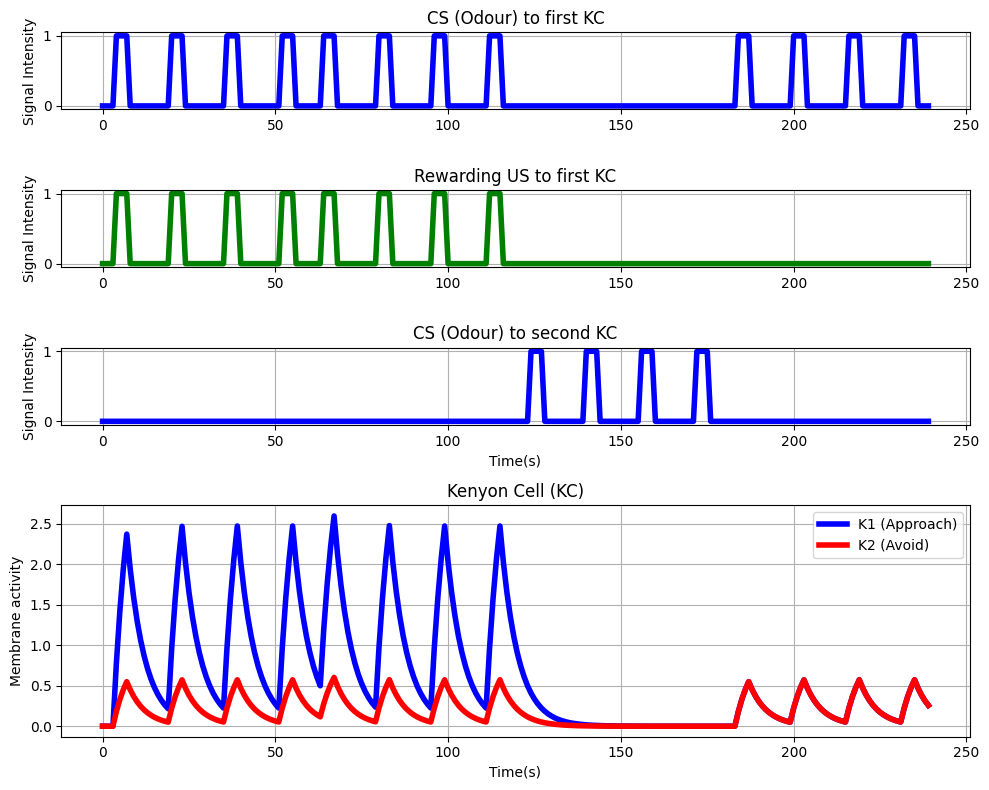

In [ ]:
# Create a 2x2 grid with different row heights
fig = plt.figure(figsize=(10, 8)) #width,Height
gs = gridspec.GridSpec(4, 2, height_ratios=[1, 1, 1, 3])

# Create subplots
ax1 = plt.subplot(gs[0, :])
ax2 = plt.subplot(gs[1, :])
ax3 = plt.subplot(gs[2, :])
ax4 = plt.subplot(gs[3, :])

# Plot something in each subplot
ax1.plot(CS1, 'b', linewidth=4)
ax1.grid(True)
ax1.set_title('CS (Odour) to first KC')
ax1.set_ylabel('Signal Intensity')

ax2.plot(US11, 'g', linewidth=4)
ax2.grid(True)
ax2.set_title('Rewarding US to first KC')
ax2.set_ylabel('Signal Intensity')

ax3.plot(CS2, 'b', linewidth=4)
ax3.grid(True)
ax3.set_title('CS (Odour) to second KC')
ax3.set_xlabel('Time(s)')
ax3.set_ylabel('Signal Intensity')

ax4.plot(K_i[0,:],'b',linewidth=4,label='K1')
ax4.plot(K_i[1,:],'r',linewidth=4,label='K2')
ax4.grid(True)
ax4.set_ylabel('Membrane activity')
ax4.set_title('Kenyon Cell (KC)')
ax4.set_xlabel('Time(s)')
ax4.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

#Introducing Mushrum Body Output Neurons (MBON) to the system

In [ ]:
import numpy as np

# Define constants
gamma = -1  # Strength of inhibitory projection from M-cells (fixed synapses)
beta_initial = 0.3  # Initial strength of excitatory projection from K-cells (plastic synapses)
tau_K = 0.5  # Time-constant of K-cell activity
Mmax = 1  # Maximal M-cell activity
Mhalf = 0.5  # Non-linearity of activation function
M_0 = 0  # Initial M-cell activity
tau_M = 0.5  # Time-constant of M-cell activity

# Weight matrices
W_matrix = np.array([[beta_initial, 0, beta_initial, 0],
                     [0, beta_initial, 0, beta_initial]])
M_matrix = np.array([[gamma, 0],
                     [0, gamma]])
#Each Mcell get the fixed inhibitory input from the other M cell and connected to both K cell in the previous layer (at the begginig with same weight strenght)

## applying Short term synaptic plasticity into the system (STDP)
# Threshold for inducing synaptic plasticity
thr = 1

# Initial values for P_eff
P_eff_initial = 0.1
f_D = 1
P_0 = 0.1
tau_P = 15
P_efactor = np.exp(-1 / tau_P)
efactor_M = np.exp(-1 / tau_M)

# Assume you have a K_i array defined here
N_i = len(K_i[0])

# Initialize arrays
P_eff = np.array([P_eff_initial] * 4)
beta = np.array([beta_initial] * 4)
M_ini = np.ones((2, N_i))
M_i = np.full((2, N_i), np.nan)

# Activation function
def activation_function(x, Mmax, Mhalf):
    return Mmax / (1 + np.exp(-(x - Mhalf)))

# Main loop
for i in range(N_i):
    M_input_i = W_matrix @ K_i[:, i][:, np.newaxis] + M_matrix @ M_ini
    M_ss_i = activation_function(M_input_i, Mmax, Mhalf)
    M_i[:, i] = M_ss_i[:, 0] + (M_ini[:, i - 1] - M_ss_i[:, 0]) * efactor_M
    M_ini[:, i] = M_i[:, i]

    for j in range(4):
        if K_i[j, i] > thr:
            P_eff[j] += f_D * (1 - P_eff[j])
            beta[j] = P_eff[j]
        else:
            P_eff[j] = P_0 + (P_eff[j] - P_0) * P_efactor
            beta[j] = P_eff[j]

# Now, the beta values have been updated based on the conditions.


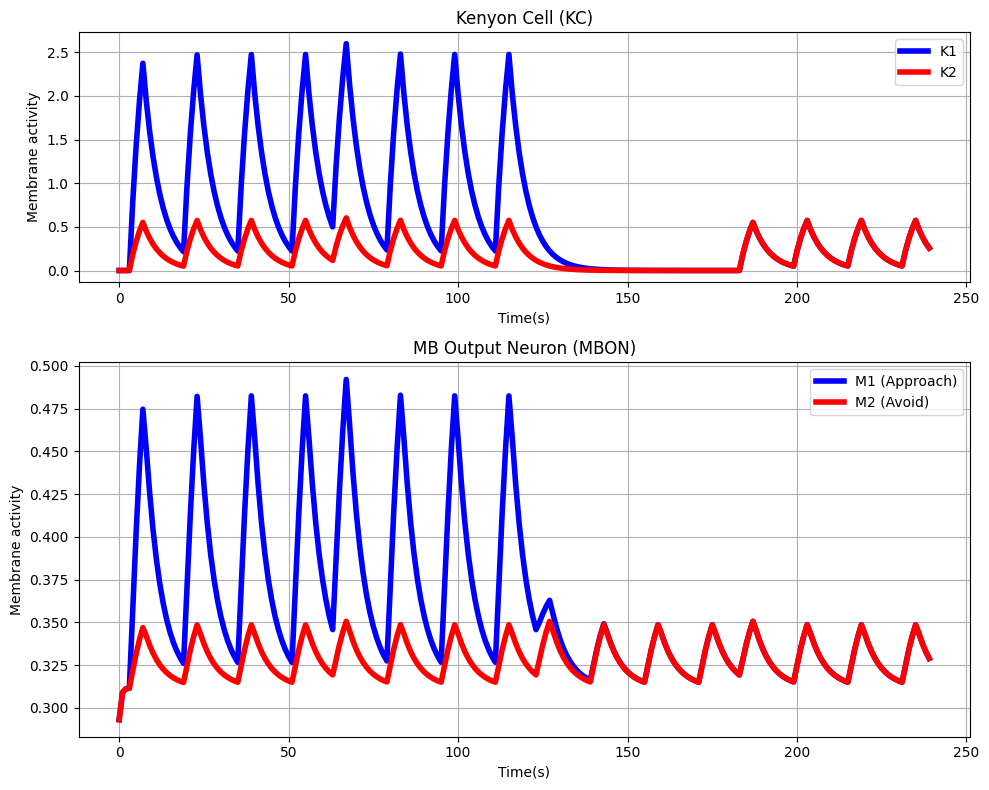

In [ ]:
fig = plt.figure(figsize=(10, 8)) #width,Height
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 3])

# Create subplots
ax1 = plt.subplot(gs[0, :])
ax2 = plt.subplot(gs[1, :])

ax1.plot(K_i[0,:],'b',linewidth=4,label='K1')
ax1.plot(K_i[1,:],'r',linewidth=4,label='K2')
ax1.grid(True)
ax1.set_ylabel('Membrane activity')
ax1.set_title('Kenyon Cell (KC)')
ax1.set_xlabel('Time(s)')
ax1.legend()

ax2.plot(M_i[0,:],'b',linewidth=4,label='M1 (Approach)')
ax2.plot(M_i[1,:],'r',linewidth=4,label='M2 (Avoid)')
ax2.grid(True)
ax2.set_ylabel('Membrane activity')
ax2.set_title('MB Output Neuron (MBON)')
ax2.set_xlabel('Time(s)')
ax2.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()